<a href="https://colab.research.google.com/github/minami1009/tools/blob/master/Fig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title If your data is on Google spreadsheet (if you input your data manually, you can skip here)

from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#input your spreadsheet url
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/xxxxxx'



Mounted at /content/drive


For example: when you want to visualize 2 types of data, each n=5

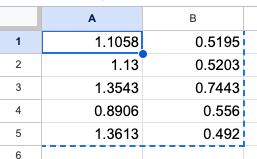

Your output barplot will be...

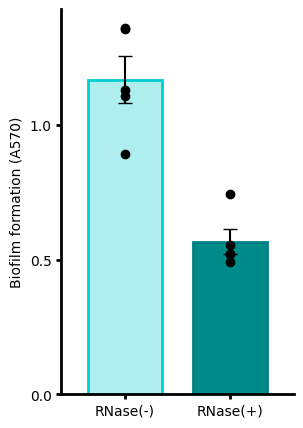

In [2]:
#@title Install Python package (just click)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

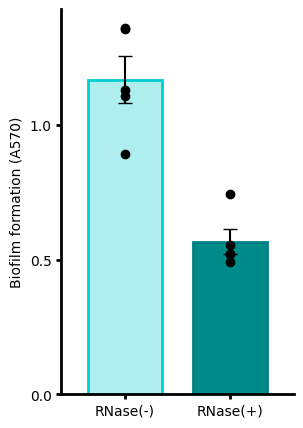

In [4]:
#@title barplot with individual points

worksheet = gc.open_by_url(spreadsheet_url).worksheet("biofilm_oe") # input your sheet name of spreadsheet (instead of biofilm_oe)
data = worksheet.get_all_values()

# Create DataFrame
df = pd.DataFrame(data, columns=["RNase(-)", "RNase(+)"]) # input your column name
df = df.astype(float)

# Transpose the DataFrame
df_transposed = df.T

# Calculate mean and standard error
means = df_transposed.mean(axis=1)
errors = df_transposed.sem(axis=1)

# Plot the data
plt.figure(figsize=(3, 5), linewidth=2) #figsize: (横, 縦)のピクセル

# エラーバーが不要な場合は、"yerr=errors, "の部分を消す
# barの色はcolor=[]の部分で変えられる。3つ以上を使うときは色の名前かカラーコードとかで指定するとよい
means.plot(kind='bar', yerr=errors, capsize=5, color=['paleturquoise', 'darkcyan'],
                    rot=0, edgecolor=["darkturquoise", "teal"], width=0.7, linewidth=2)

# Plot individual data points
for i, group in enumerate(df_transposed.index):
    plt.scatter([i] * len(df_transposed.loc[group]), df_transposed.loc[group], color='black', zorder=2)

#y軸の名前
plt.ylabel('Biofilm formation (A570)')

#y軸の最小・最大（最大はmeans+errorsの大きい方に＋0.1したところ）、最後の0.5を変えると軸ラベルの幅を変えられる
plt.yticks(np.arange(0, max(means + errors) + 0.1, 0.5))

#グラフの上と右は囲わないように設定
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().tick_params(width=2)

# Display the plot
#plt.show()

plt.savefig('/content/drive/MyDrive/output_figure.tiff',transparent=True)

In [ ]:
#@title check the version of Python and Python package (if you need to clarify for the M&M)

import sys
print(sys.version)
import matplotlib
print(matplotlib.__version__)
import seaborn
print(seaborn.__version__)

3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
